In [27]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

data = sqlContext.read.format('com.databricks.spark.csv').options(header='false', inferschema='true', delimiter=',')\
    .load('../big-data/YearPredictionMSD.txt')

In [28]:
data.printSchema

<bound method DataFrame.printSchema of DataFrame[C0: int, C1: double, C2: double, C3: double, C4: double, C5: double, C6: double, C7: double, C8: double, C9: double, C10: double, C11: double, C12: double, C13: double, C14: double, C15: double, C16: double, C17: double, C18: double, C19: double, C20: double, C21: double, C22: double, C23: double, C24: double, C25: double, C26: double, C27: double, C28: double, C29: double, C30: double, C31: double, C32: double, C33: double, C34: double, C35: double, C36: double, C37: double, C38: double, C39: double, C40: double, C41: double, C42: double, C43: double, C44: double, C45: double, C46: double, C47: double, C48: double, C49: double, C50: double, C51: double, C52: double, C53: double, C54: double, C55: double, C56: double, C57: double, C58: double, C59: double, C60: double, C61: double, C62: double, C63: double, C64: double, C65: double, C66: double, C67: double, C68: double, C69: double, C70: double, C71: double, C72: double, C73: double, C7

In [29]:
data.cache()
data.count()

515345

In [30]:
data.describe().collect()

[Row(summary=u'count', C0=u'515345', C1=u'515345', C2=u'515345', C3=u'515345', C4=u'515345', C5=u'515345', C6=u'515345', C7=u'515345', C8=u'515345', C9=u'515345', C10=u'515345', C11=u'515345', C12=u'515345', C13=u'515345', C14=u'515345', C15=u'515345', C16=u'515345', C17=u'515345', C18=u'515345', C19=u'515345', C20=u'515345', C21=u'515345', C22=u'515345', C23=u'515345', C24=u'515345', C25=u'515345', C26=u'515345', C27=u'515345', C28=u'515345', C29=u'515345', C30=u'515345', C31=u'515345', C32=u'515345', C33=u'515345', C34=u'515345', C35=u'515345', C36=u'515345', C37=u'515345', C38=u'515345', C39=u'515345', C40=u'515345', C41=u'515345', C42=u'515345', C43=u'515345', C44=u'515345', C45=u'515345', C46=u'515345', C47=u'515345', C48=u'515345', C49=u'515345', C50=u'515345', C51=u'515345', C52=u'515345', C53=u'515345', C54=u'515345', C55=u'515345', C56=u'515345', C57=u'515345', C58=u'515345', C59=u'515345', C60=u'515345', C61=u'515345', C62=u'515345', C63=u'515345', C64=u'515345', C65=u'515345

In [31]:
avg_by_year = data.groupBy('C0').mean().collect()

In [32]:
avg_by_year[0]

Row(C0=1922, avg(C0)=1922.0, avg(C1)=41.56384666666666, avg(C2)=13.90862333333333, avg(C3)=14.68464166666667, avg(C4)=24.427253333333336, avg(C5)=18.752738333333337, avg(C6)=11.173279999999998, avg(C7)=-5.309713333333334, avg(C8)=0.1368183333333334, avg(C9)=-2.1648300000000003, avg(C10)=-4.444308333333334, avg(C11)=-1.621851666666667, avg(C12)=-5.5609133333333345, avg(C13)=27.377290000000002, avg(C14)=1828.3739083333332, avg(C15)=3055.671513333333, avg(C16)=2035.5200966666669, avg(C17)=995.3578116666667, avg(C18)=1601.3581466666667, avg(C19)=1100.8831583333333, avg(C20)=681.9351916666666, avg(C21)=401.404465, avg(C22)=476.94627833333334, avg(C23)=486.8414833333333, avg(C24)=458.48900000000003, avg(C25)=-64.84647333333334, avg(C26)=-823.5429516666665, avg(C27)=-507.0455733333334, avg(C28)=20.94561666666667, avg(C29)=-20.879060000000003, avg(C30)=246.32746833333331, avg(C31)=15.392000000000001, avg(C32)=69.39221166666667, avg(C33)=-7.939600000000001, avg(C34)=20.781164999999998, avg(C35)

In [33]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


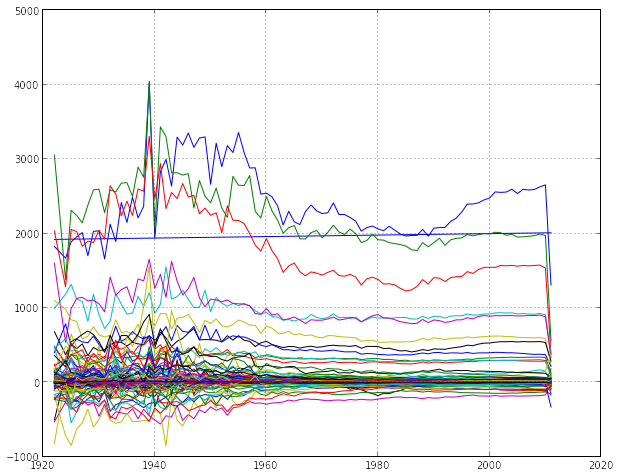

In [34]:
import matplotlib.pyplot as plt
for i in range(1,len(avg_by_year[0])):
    plt.plot(map(lambda r:r[0],avg_by_year), map(lambda r:r[i],avg_by_year))
plt.grid(True)
plt.show()

In [35]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import PCA
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline


all_assembler = VectorAssembler(
    inputCols=map(lambda s:s.name,data.schema.fields)[:-1],
    outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="norm_features")
pca = PCA(k=2, inputCol="norm_features", outputCol="pca_features")
pca_pipeline = Pipeline(stages=[all_assembler, normalizer, pca])
pca_model = pca_pipeline.fit(data)
pca_model.transform(data).first()

Row(C0=2001, C1=49.94357, C2=21.47114, C3=73.0775, C4=8.74861, C5=-17.40628, C6=-13.09905, C7=-25.01202, C8=-12.23257, C9=7.83089, C10=-2.46783, C11=3.32136, C12=-2.31521, C13=10.20556, C14=611.10913, C15=951.0896, C16=698.11428, C17=408.98485, C18=383.70912, C19=326.51512, C20=238.11327, C21=251.42414, C22=187.17351, C23=100.42652, C24=179.19498, C25=-8.41558, C26=-317.87038, C27=95.86266, C28=48.10259, C29=-95.66303, C30=-18.06215, C31=1.96984, C32=34.42438, C33=11.7267, C34=1.3679, C35=7.79444, C36=-0.36994, C37=-133.67852, C38=-83.26165, C39=-37.29765, C40=73.04667, C41=-37.36684, C42=-3.13853, C43=-24.21531, C44=-13.23066, C45=15.93809, C46=-18.60478, C47=82.15479, C48=240.5798, C49=-10.29407, C50=31.58431, C51=-25.38187, C52=-3.90772, C53=13.29258, C54=41.5506, C55=-7.26272, C56=-21.00863, C57=105.50848, C58=64.29856, C59=26.08481, C60=-44.5911, C61=-8.30657, C62=7.93706, C63=-10.7366, C64=-95.44766, C65=-82.03307, C66=-35.59194, C67=4.69525, C68=70.95626, C69=28.09139, C70=6.020

In [36]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [37]:
import matplotlib.pyplot as plt
sampling_fraction = 0.01
pca_data = pca_model.transform(data.sample(False, sampling_fraction, 13))
pca_xy = np.matrix(map(lambda r:r.pca_features.array, pca_data.collect()))
pca_colors = map(lambda r: float(r.C0),data.select('C0').sample(False, sampling_fraction, 13).collect())

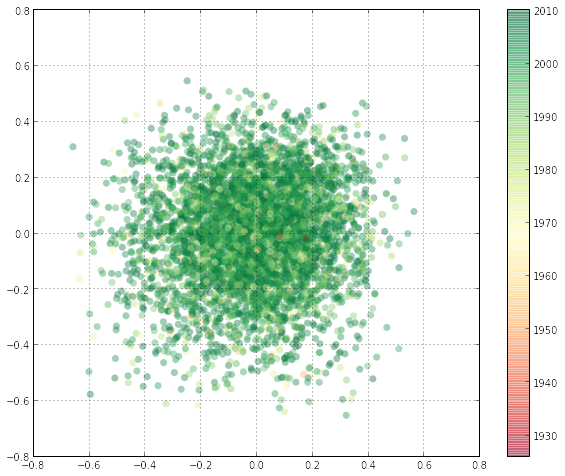

In [38]:
plt.scatter(pca_xy[:,0], pca_xy[:,1], c=pca_colors, alpha=0.4, cmap=plt.get_cmap('RdYlGn'), edgecolors='none', s=50)
plt.grid(True)
plt.colorbar()
plt.show()

In [39]:
select = "C0 < 1950"
pca_data = pca_model.transform(data.where(select))
pca_xy = np.matrix(map(lambda r:r.pca_features.array, pca_data.collect()))
pca_colors = map(lambda r: float(r.C0),data.select('C0').where(select).collect())

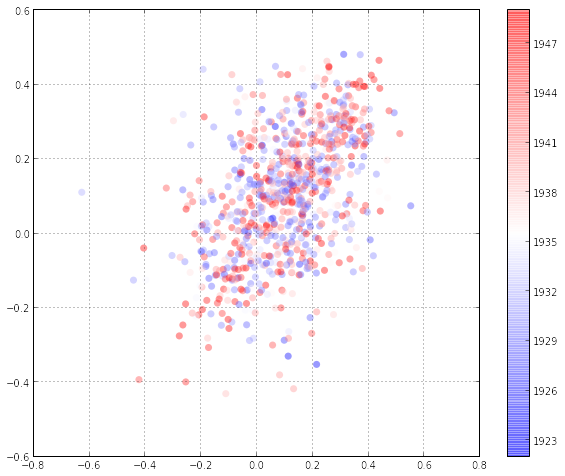

In [40]:
plt.scatter(pca_xy[:,0], pca_xy[:,1], c=pca_colors, alpha=0.4, cmap=plt.get_cmap('bwr'), edgecolors='none', s=50)
plt.grid(True)
plt.colorbar()
plt.show()

In [54]:
import numpy
pf = pca_data.select('pca_features')
pf.rdd.count()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 46.0 failed 1 times, most recent failure: Lost task 3.0 in stage 46.0 (TID 1294, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 2346, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 2346, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 317, in func
    return f(iterator)
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 1004, in <lambda>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 1004, in <genexpr>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 139, in load_stream
    yield self._read_with_length(stream)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 164, in _read_with_length
    return self.loads(obj)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 422, in loads
    return pickle.loads(obj)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 730, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 750, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 527, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 427, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 752, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 665, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/mllib/__init__.py", line 25, in <module>
ImportError: ('No module named numpy', <function _parse_datatype_json_string at 0x104db1cf8>, (u'{"type":"struct","fields":[{"name":"pca_features","type":{"type":"udt","class":"org.apache.spark.mllib.linalg.VectorUDT","pyClass":"pyspark.mllib.linalg.VectorUDT","sqlType":{"type":"struct","fields":[{"name":"type","type":"byte","nullable":false,"metadata":{}},{"name":"size","type":"integer","nullable":true,"metadata":{}},{"name":"indices","type":{"type":"array","elementType":"integer","containsNull":false},"nullable":true,"metadata":{}},{"name":"values","type":{"type":"array","elementType":"double","containsNull":false},"nullable":true,"metadata":{}}]}},"nullable":true,"metadata":{}}]}',))

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:483)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 2346, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 2346, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 317, in func
    return f(iterator)
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 1004, in <lambda>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/opt/spark-1.6.0/python/pyspark/rdd.py", line 1004, in <genexpr>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 139, in load_stream
    yield self._read_with_length(stream)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 164, in _read_with_length
    return self.loads(obj)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/serializers.py", line 422, in loads
    return pickle.loads(obj)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 730, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 750, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 527, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 427, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 752, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/sql/types.py", line 665, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "/opt/spark-1.6.0/python/lib/pyspark.zip/pyspark/mllib/__init__.py", line 25, in <module>
ImportError: ('No module named numpy', <function _parse_datatype_json_string at 0x104db1cf8>, (u'{"type":"struct","fields":[{"name":"pca_features","type":{"type":"udt","class":"org.apache.spark.mllib.linalg.VectorUDT","pyClass":"pyspark.mllib.linalg.VectorUDT","sqlType":{"type":"struct","fields":[{"name":"type","type":"byte","nullable":false,"metadata":{}},{"name":"size","type":"integer","nullable":true,"metadata":{}},{"name":"indices","type":{"type":"array","elementType":"integer","containsNull":false},"nullable":true,"metadata":{}},{"name":"values","type":{"type":"array","elementType":"double","containsNull":false},"nullable":true,"metadata":{}}]}},"nullable":true,"metadata":{}}]}',))

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more
